<a href="https://colab.research.google.com/github/Steve-YJ/Explore-Kaggle/blob/master/01_Simple_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 복기(Remind) - Simple model works fine
* 복잡한 모델만이 항상 올바른 것은 아니다
* 복기를 통해 내것으로 만들 수 있도록 하자 -20.12.11.Fri. pm3:00-

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Explore-Kaggle/01. Titanic
!ls

/content/drive/MyDrive/Explore-Kaggle/01. Titanic
'01. Simple_pipeline.ipynb'   test.csv	 train.csv


# 1. Import Library

In [4]:
import pandas  as pd
import numpy as np

# 2. Prepare Data

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape, test.shape)

(891, 12) (418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Feature Engineering
* 모델이 학습할 수 있도록 데이터를 준비하고 Feature를 선별하는 단계
* category value를 numeric value로 변경하기(직접 해보기!)

우선 어떤 Feature가 있는지 확인을 해보자

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
print(train.iloc[1:11])

    PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
1             2         1       1  ...  71.2833   C85         C
2             3         1       3  ...   7.9250   NaN         S
3             4         1       1  ...  53.1000  C123         S
4             5         0       3  ...   8.0500   NaN         S
5             6         0       3  ...   8.4583   NaN         Q
6             7         0       1  ...  51.8625   E46         S
7             8         0       3  ...  21.0750   NaN         S
8             9         1       3  ...  11.1333   NaN         S
9            10         1       2  ...  30.0708   NaN         C
10           11         1       3  ...  16.7000    G6         S

[10 rows x 12 columns]


'Embarked' feature를 처리해보자<br>
*nominal variable을 어떻게 처리할 수 있을까?*

## Step1. 전체 데이터 확인하기

가장 원시적인 방법은 전체 데이터를 반복하며 값을 일일이 바꿔주는 방법일 것이다 

In [10]:
for i in range(len(train)):
    temp = train.iloc[i, 11]
    if temp == "S":
        train.iloc[i, 11] = 0
    elif temp == "C":
        train.iloc[i, 11] = 1
    elif temp == "Q":
        train.iloc[i, 11] = 2


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [12]:
train.Embarked.unique()

array([0, 1, 2, nan], dtype=object)

여기서 많이들 실수하는 부분이 있다. 바로 train set뿐만 아니라 'test set'도 바꿔줘야 한다는 점이다.

In [13]:
for i in range(len(test)):
    temp = test.iloc[i, 10]
    if temp == "S":
        test.iloc[i, 10] = 0
    elif temp == "C":
        test.iloc[i, 10] = 1
    elif temp == "Q":
        test.iloc[i, 10] = 2

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0


In [15]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
train.Name = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train.Name

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


In [18]:
test.Name = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test.Name

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,0


In [20]:
train.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [21]:
test.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [22]:
dummy = []
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']

for i in range(891):
    temp = train.iloc[i, 3]

    if temp in Mr:
        train.iloc[i, 3] = "Mr"
    elif temp in Mrs:
        train.iloc[i, 3] = "Mrs"
    elif temp in Miss:
        train.iloc[i, 3] = "Miss"
    elif temp == "Dr":
        if train.iloc[i, 4] == "male":
            train.iloc[i, 3] = "Mr"
        else: 
            train.iloc[i, 3] = "Mrs"

    else:
        dummy.append(temp)
        pass

print(set(dummy))

{'Mr', 'Mrs', 'Master', 'Miss'}


In [23]:
dummy=[]
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']

for i in range(418):
    temp = test.iloc[i,2]
    if temp in Mr:
        test.iloc[i,2]="Mr"
    elif temp in Mrs:
        test.iloc[i,2]="Mrs"
    elif temp in Miss :
        test.iloc[i,2]="Miss"
    elif temp =='Dr':
        if test.iloc[i,3]=="male":
            test.iloc[i,2]="Mr"
        else:
            test.iloc[i,2]="Mrs"
    elif temp =="Dona":
        test.iloc[i,2]="Mrs"
    else:
        dummy.append(temp)
        pass

print(set(dummy))

train.head()

{'Mr', 'Mrs', 'Master', 'Miss'}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


## Step2. Label Encoder 모듈을 사용해 전처리 하기
* Label Encoder 모듈을 사용하면 전처리 작업을 더 쉽게 할 수 있다

In [24]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

import pandas as pd  # for data processing
from sklearn.model_selection import train_test_split

# Label Encoder를 활용하면 전처리 작업을 더 쉽게 할 수 있다
label_encoder = LabelEncoder()
label_encoder.fit(train.Sex)
train.loc[:, 'Sex'] = label_encoder.transform(train.Sex)
test.loc[:, 'Sex'] = label_encoder.transform(test.Sex)

In [25]:
# 이번에는 Name 변수를 Encoding해보자
label_encoder = LabelEncoder()
label_encoder.fit(train.Name)
train.loc[:, 'Name'] = label_encoder.transform(train.Name)
test.loc[:, 'Name'] = label_encoder.transform(test.Name)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0


널값(Na)도 다뤄보자

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

널값이 있는 변수들 중 우선 Age 변수를 인코딩해보자

In [28]:
dummy_age = round(train.Age.mean(), 1)
print("dummy_age: ",dummy_age)

train.loc[:, "Age"] = train.Age.fillna(dummy_age)  # Age 변수의 Na값을 평균 나이 값으로 채워주자
test.loc[:, "Age"] = test.Age.fillna(dummy_age)

dummy_age:  29.7


평균 나이값을 널값으로 입력해주었다.다음으로 Embarked를 채워보자 

In [29]:
train.loc[:, "Embarked"] = train.Embarked.fillna(2)
test.loc[:, "Embarked"] = test.Embarked.fillna(2)

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

이번 튜토리얼에서는 Null값 처리를 여기까지 하겠다. (Cabin은 안타깝지만 날려버리자...!)

# 3. Classification

In [31]:
X = train.loc[:, ["Age", "Sex", "Pclass", "Embarked", "SibSp"]]
Y = train.loc[:, "Survived"]
X_test = test.loc[:, ["Age", "Sex", "Pclass", "Embarked", "SibSp"]]

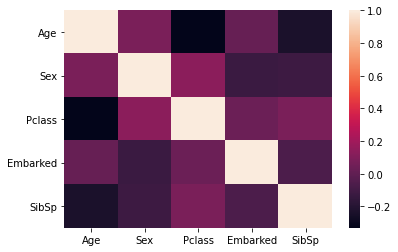

In [32]:
import seaborn as sns

corr = X.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Simple Classifier를 만들어보자<br>
일반적으로 train/test/validation은 60/20/20의 비율이 좋다고 알려져 있다.<br>
본 튜토리얼에서는 testset이 이미 빠져있으므로 test_size를 20%로 정한다.<br>



In [33]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2)

In [35]:
# 앙상블 모델을 학습시켜보자

from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

model1 = svm.LinearSVC()
model2 = neighbors.KNeighborsClassifier()
model3 = RandomForestClassifier()
model4 = LogisticRegression()
model5 = LinearDiscriminantAnalysis()
model6 = DecisionTreeClassifier()
model7 = MLPClassifier()
model8 = ExtraTreesClassifier()
model9 = AdaBoostClassifier()
model10 = GradientBoostingClassifier()
model11 = XGBClassifier()

clf = VotingClassifier(estimators = [
                                    ('lscv', model1),
                                    ('knn', model2),
                                    ('rfor', model3),
                                    ('lr', model4), #0.8 #0.78
                                    ('lda', model5), #0.78 #0.77
                                    ('dc', model6), #0.81 #0.82
                                    ('mlpc', model7), #0.78 #0.8
                                    ('etc', model8), #0.78 #0.81
                                    ('abc', model9), #0.8 #0.81
                                    ("gbc",model10), #0.76 #0.8/
                                    ("XG",model11) #0.81
])
clf.fit(x_train, y_train)

confidence = clf.score(x_valid, y_valid)
print("Accuracy: ", confidence)
predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy:  0.8212290502793296


In [36]:
sub = pd.DataFrame({'PassengerId': test['PassengerId'],
                    'Survived': predictions})
sub.to_csv('submission.csv', index=False)